# Part 7 -- Vectorize Features

Prepare data for **Singular Value Decomposition (SVD)**.

### Load lib codes:

In [156]:
!pwd

/home/jovyan/work/Portfolio/predicting_stock_market_trends_with_Twitter


In [157]:
from os import chdir
chdir('/home/jovyan/work/Portfolio/predicting_stock_market_trends_with_Twitter/')

from lib import *
from lib.twitter_keys import my_keys
# suppress_warnings()
%matplotlib inline


In [158]:
X = pd.read_pickle('../predicting_stock_market_trends_with_Twitter/data/X.pickle')

### Vectorize FEATURES (fit & transform on all tweets):

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
start = datetime.now()

tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=2)
X_tfidf = tfidf.fit_transform(X['cleaned_text'])

end = datetime.now()
print(end - start)

0:00:09.409735


In [137]:
type(tfidf)

sklearn.feature_extraction.text.TfidfVectorizer

In [138]:
type(X_tfidf)

scipy.sparse.csr.csr_matrix

In [139]:
print(X_tfidf[0])

  (0, 165619)	0.129219084724
  (0, 53111)	0.17229458748
  (0, 95082)	0.116509836194
  (0, 11047)	0.0567262901315
  (0, 132047)	0.192885295793
  (0, 155294)	0.0815980414988
  (0, 32683)	0.176128236839
  (0, 110467)	0.107976252854
  (0, 121306)	0.0933890146053
  (0, 97066)	0.145194885793
  (0, 67806)	0.0856480957711
  (0, 142123)	0.181621648458
  (0, 86124)	0.15712526377
  (0, 118033)	0.0913920736038
  (0, 165409)	0.150821702662
  (0, 9809)	0.0908796315656
  (0, 124837)	0.203345795735
  (0, 95088)	0.18242479585
  (0, 12982)	0.219951727556
  (0, 132048)	0.219951727556
  (0, 156300)	0.225842775621
  (0, 32691)	0.225842775621
  (0, 112637)	0.087893733595
  (0, 159552)	0.145328291044
  (0, 121545)	0.165910078584
  (0, 111826)	0.208492120509
  (0, 68373)	0.211648761646
  (0, 118513)	0.192885295793
  (0, 165412)	0.208492120509
  (0, 156301)	0.225842775621
  (0, 112852)	0.18915178176
  (0, 159560)	0.17673955488
  (0, 121552)	0.219951727556
  (0, 118514)	0.225842775621


In [140]:
X_tfidf.shape

(68006, 194537)

In [141]:
pd.to_pickle(X_tfidf, '../predicting_stock_market_trends_with_Twitter/data/X_tfidf.pickle')

### Explore TFIDF vectors

In [142]:
tfidf.get_feature_names()[-100:]

['zkouwe',
 'zlatanholding',
 'zlatanholding d4ytrad3',
 'zn',
 'znga',
 'zodiac',
 'zomato',
 'zomato got',
 'zomato got off',
 'zombie',
 'zombie apocalypse',
 'zombie companies',
 'zombie retailers',
 'zombie trumpcare',
 'zombies',
 'zone',
 'zones',
 'zones for',
 'zones for its',
 'zoo',
 'zoo animals',
 'zoom',
 'zoom built',
 'zoom built 1b',
 'zoom in',
 'zooms',
 'zooms up',
 'zooms up as',
 'zoos',
 'zootopia',
 'zootopia wins',
 'zootopia wins best',
 'zopa',
 'zortrades',
 'zpas',
 'zsan',
 'zsan nice',
 'zshrier',
 'zts',
 'zu',
 'zuck',
 'zucker',
 'zucker talks',
 'zucker talks to',
 'zuckerberg',
 'zuckerberg and',
 'zuckerberg and other',
 'zuckerberg billion',
 'zuckerberg fb',
 'zuckerberg gets',
 'zuckerberg gets trolled',
 'zuckerberg got',
 'zuckerberg got accepted',
 'zuckerberg harvard',
 'zuckerberg harvard commencement',
 'zuckerberg has',
 'zuckerberg has spoken',
 'zuckerberg if',
 'zuckerberg if we',
 'zuckerberg is',
 'zuckerberg is running',
 'zuckerberg

In [143]:
from wordcloud import WordCloud, STOPWORDS

In [144]:
combined_df_AAPL = pd.read_pickle('../predicting_stock_market_trends_with_Twitter/data/combined_df_AAPL.pickle')

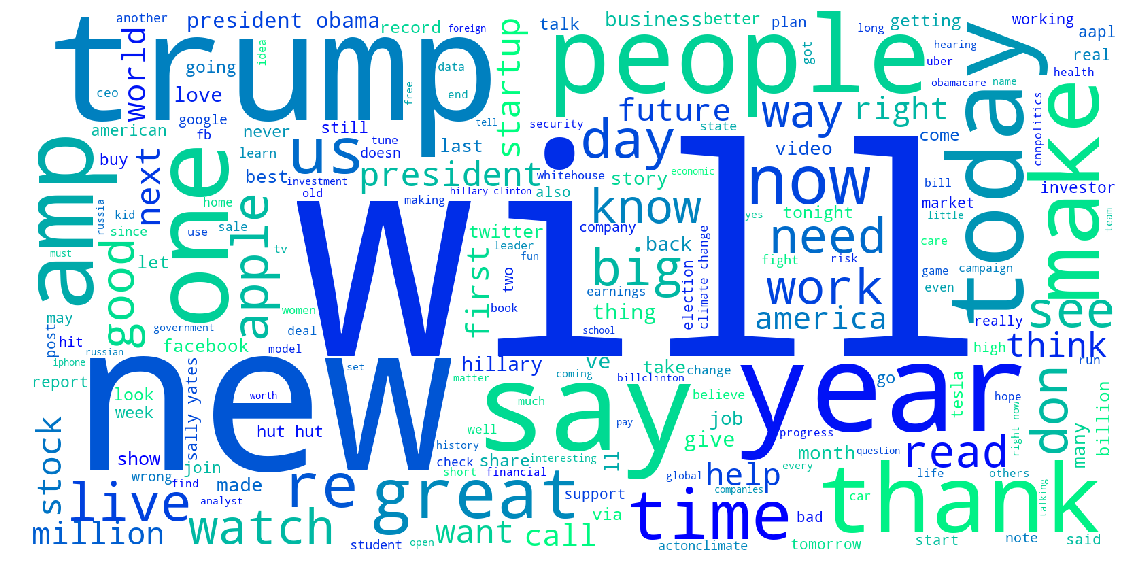

In [150]:
stopwords = set(STOPWORDS)
stopwords.add("rt")
buy_wc = WordCloud(width=1600, height=800, background_color='white', relative_scaling=1, stopwords=stopwords, colormap='winter').generate(' '.join(i for i in combined_df_AAPL['cleaned_text'][combined_df_AAPL[0]=='buy']))

plt.figure(figsize=(20,10))
plt.imshow(buy_wc)
plt.axis("off")
plt.show()

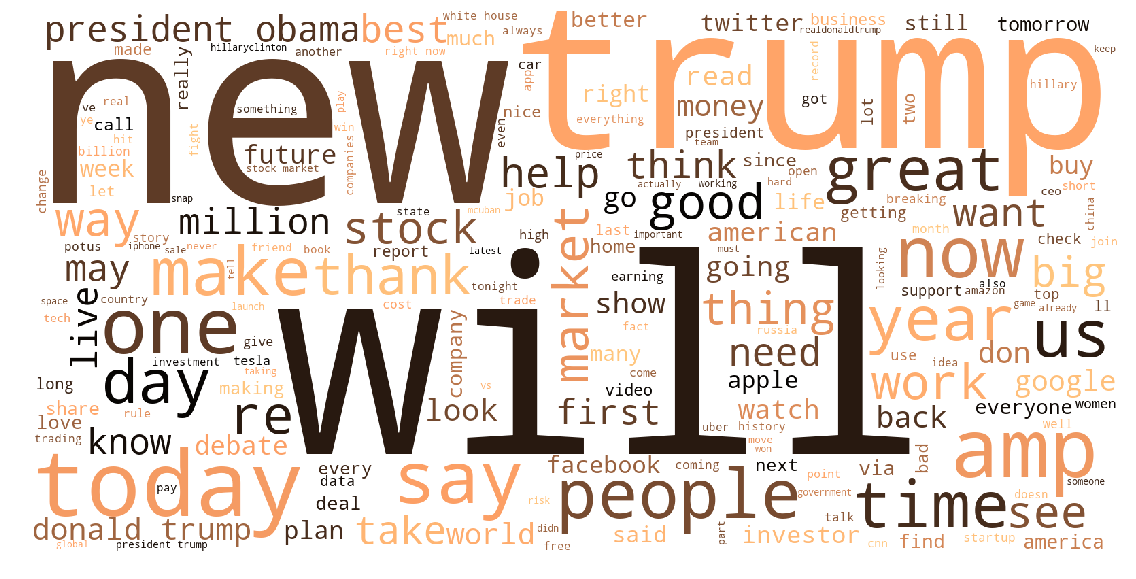

In [151]:
stopwords = set(STOPWORDS)
stopwords.add("rt")
neutral_wc = WordCloud(width=1600, height=800, background_color='white', relative_scaling=1, stopwords=stopwords, colormap='copper').generate(' '.join(i for i in combined_df_AAPL['cleaned_text'][combined_df_AAPL[0]=='neutral']))

plt.figure(figsize=(20,10))
plt.imshow(neutral_wc)
plt.axis("off")
plt.show()

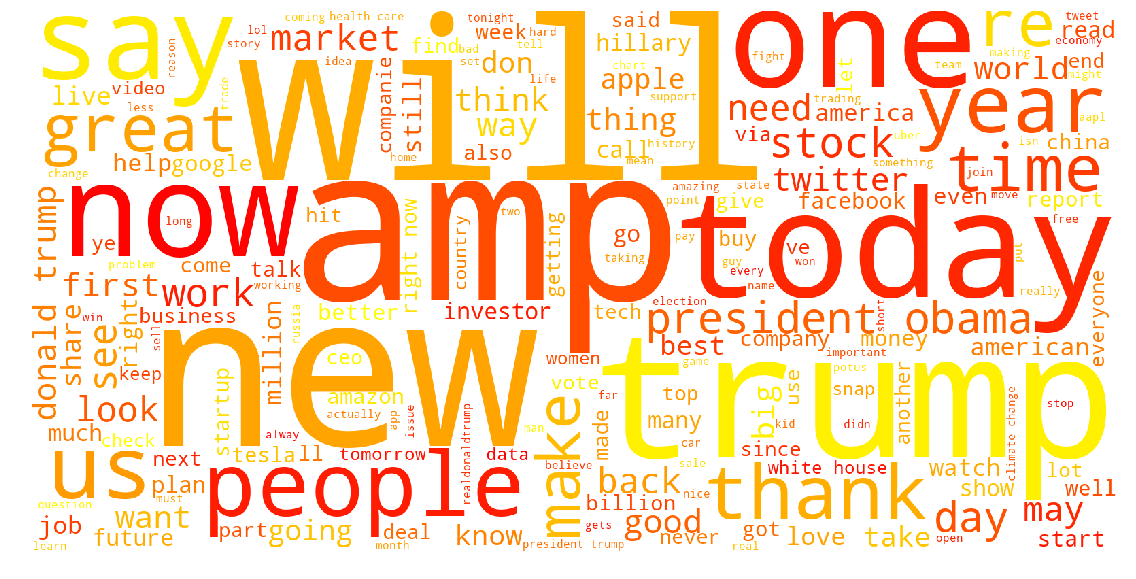

In [153]:
stopwords = set(STOPWORDS)
stopwords.add("rt")
sell_wc = WordCloud(width=1600, height=800, background_color='white', relative_scaling=1, stopwords=stopwords, colormap='autumn').generate(' '.join(i for i in combined_df_AAPL['cleaned_text'][combined_df_AAPL[0]=='sell']))

plt.figure(figsize=(20,10))
plt.imshow(sell_wc)
plt.axis("off")
plt.show()

### LabelEncode TARGET (for LogisticRegression models)

In [159]:
y_AAPL = pd.read_pickle('../predicting_stock_market_trends_with_Twitter/data/y_AAPL.pickle')

In [160]:
from sklearn.preprocessing import LabelEncoder

In [161]:
le = LabelEncoder()

In [163]:
y_AAPL_le = le.fit_transform(y_AAPL)

In [177]:
le.inverse_transform(y_AAPL_le)

array([array(['down'], dtype=object), array(['down'], dtype=object),
       array(['down'], dtype=object), ..., array(['up'], dtype=object),
       array(['up'], dtype=object), array(['up'], dtype=object)], dtype=object)

In [178]:
pd.to_pickle(y_AAPL_le, '../predicting_stock_market_trends_with_Twitter/data/y_AAPL_le.pickle')